In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier


In [2]:
df=pd.read_csv(r"C:/Users/YA MAALIKUL MULK/Downloads/Email_SPAM/SPAM text message 20170820 - Data.csv")



In [3]:
df.shape

(5572, 2)

In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,5562,5563,5564,5565,5566,5567,5568,5569,5570,5571
Category,ham,ham,spam,ham,ham,spam,ham,ham,spam,spam,...,ham,ham,ham,ham,spam,spam,ham,ham,ham,ham
Message,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro...",FreeMsg Hey there darling it's been 3 week's n...,Even my brother is not like to speak with me. ...,As per your request 'Melle Melle (Oru Minnamin...,WINNER!! As a valued network customer you have...,Had your mobile 11 months or more? U R entitle...,...,Ok lor... Sony ericsson salesman... I ask shuh...,Ard 6 like dat lor.,Why don't you wait 'til at least wednesday to ...,Huh y lei...,REMINDER FROM O2: To get 2.50 pounds free call...,This is the 2nd time we have tried 2 contact u...,Will ü b going to esplanade fr home?,"Pity, * was in mood for that. So...any other s...",The guy did some bitching but I acted like i'd...,Rofl. Its true to its name


In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
print("How many of each label do we have?")
print(df['Category'].value_counts())



How many of each label do we have?
ham     4825
spam     747
Name: Category, dtype: int64


In [9]:
# We need to encode our categories into numerical data so that our model is able to use it

df['labels'] = LabelEncoder().fit_transform(df['Category'])

print(df.head())


  Category                                            Message  labels
0      ham  Go until jurong point, crazy.. Available only ...       0
1      ham                      Ok lar... Joking wif u oni...       0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...       1
3      ham  U dun say so early hor... U c already then say...       0
4      ham  Nah I don't think he goes to usf, he lives aro...       0


In [10]:
# Split data into training and test sets

X = df['Message']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = None)



In [11]:

# Initialize our vectorizer

vectorizer = CountVectorizer()


In [12]:
# Lets intitialize our Naive Bayes and our Dummy Classifier

NB = MultinomialNB()
NB.fit(vectorizer.fit_transform(X_train), y_train)

Dummy = DummyClassifier(strategy = 'stratified')
Dummy.fit(vectorizer.fit_transform(X_train), y_train);

X_test_vector = vectorizer.transform(X_test)
y_pred = NB.predict(X_test_vector)


In [13]:
# Now lets define a function to evaluate our classifiers

def analyze_text(clf, vectorizer, test_text):
    """
    This helper function takes in a classifier, vectorizer and text and returns a prediction.
    Input: clf: Classifier Model, vectorizer: Vectorizer, test_text: a text passage 
    Output: Original test_text passage, the model's prediction
    """
    prediction = clf.predict(vectorizer.transform([test_text]))
    
    return(test_text, prediction)


In [23]:
def evaluate_model_accuracy(clf, test_text, test_result):
    """
    This function runs the "analyze_text" function over each row in a test_text column and compares the output to
        the test answers ("test_result" column)
    Input: clf:classifier, test_text: column of test texts, test_result: column of correct class answers
    Output: A formatted string for model accuracy (rounded to two decimal places) 
    """

    total = len(test_text)
    num_correct = 0
     
    for index, item in enumerate(test_text):
        text, result = analyze_text(clf, vectorizer, item)
        if result == test_result.iloc[index]:
            num_correct +=1 
    
    return_string = 'Model Info: ' + str(clf) + '\nModel Accuracy: ' + str(round(num_correct * 100 / total, 2)) + '%\n'
    
    print(return_string)
    
# Example usage:
evaluate_model_accuracy(NB, X_test, y_test)
evaluate_model_accuracy(Dummy, X_test, y_test)


Model Info: MultinomialNB()
Model Accuracy: 98.57%

Model Info: DummyClassifier(strategy='stratified')
Model Accuracy: 78.32%



            Confusion Matrix


C:\Users\YA MAALIKUL MULK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


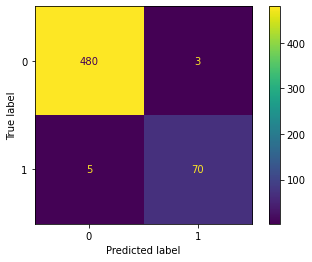

In [24]:
print("            Confusion Matrix")
plot_confusion_matrix(NB, X_test_vector, y_test);